### Objectives

First, create a graph representation of the information we have. 
This would be information about the elements, and the nodes. 
Using this, we will feed it into our SVM, or a Random Forest, and see from there onwards

In [7]:
%load_ext autoreload 
%autoreload 2

In [6]:
from Generate_Excel import *
from MitoCode_Functions import open_file_dialog
from IPython.display import display

In [4]:
import pandas as pd
import igraph as ig

def Mitograph_Graph(FileName):
    # Read information from the gnet file, and create a graph object
    # generate a function that takes in the filename and gives out the graph
    G = pd.read_table(FileName + '.gnet', skiprows=1, sep='\t', names=['Source', 'Target', 'Length'])
    graph = ig.Graph.TupleList(G.itertuples(index=False), directed=False, edge_attrs=['Length'])
    layout = graph.layout_auto()  # Automatic layout calculation
    graph.vs['degree'] = graph.degree()
    # ig.plot(graph, layout=layout)
    Vol = pd.read_table(FileName + '.cc', skiprows=0, sep='\t')
    Vol.columns = ['node', 'cc', 'vol_cc']

    ids = [int(node['name']) for node in graph.vs]
    graph.vs['cc_vol'] = [Vol.loc[Vol['node'] == node, 'vol_cc'].values[0] for node in ids]
    graph.vs['cc'] = [Vol.loc[Vol['node'] == node, 'cc'].values[0] for node in ids]
    return graph, Vol

In [5]:


# df_dir_2 = open_file_dialog()[0]
# df = pd.read_csv(df_dir_2)


In [6]:
a, p, c, n, f = Generate_Mito_Tables(open_folder_dialog())

FileNotFoundError: [Errno 2] No such file or directory: ''

In [35]:
n = pd.read_csv('./full_node_Table_.csv')
df = pd.read_csv('./full_Table_.csv')

print(df.columns)

Index(['Unnamed: 0', 'cc_x', 'cc_length_(um)', 'cc_vol_from_img_(um3)', 'branches', 'nodes', 'edges', 'cc_pixel_intensity_ratio',
       'cc_pixel_intensity_488', 'cc_pixel_intensity_405', 'degree_distribution', 'cc_average_degree_excludeFreeEnds', 'cc_max_PK',
       'cc_average_connectivity', 'line_id', 'diameter', 'folder_name_x', 'element_length_(um)', 'element_average_width',
       'element_pixel_intensity_488', 'element_pixel_intensity_405', 'element_pixel_intensity_ratio', 'folder_name_x.1', 'element_Volume_Voxel',
       'point_id', 'x_x', 'y_x', 'z_x', 'width_(um)', 'pixel_intensity', 'x_pixel', 'y_pixel', 'z_pixel', 'pixel_intensity_488',
       'pixel_intensity_405', 'pixel_intensity_ratio', 'pixel_intensity_555', 'x_y', 'y_y', 'z_y', 'node', 'degree', 'cc_y', 'vol_cc',
       'avg_PK_Of_element', 'element_connectivity', 'folder_name_y', 'coeff_of_variance_cc', 'coeff_of_variance_line_id'],
      dtype='object')


In [27]:
cc_df = df[['cc_x', 'folder_name_x', 'cc_pixel_intensity_488', 'cc_pixel_intensity_405', 'cc_pixel_intensity_ratio', 'cc_average_degree_excludeFreeEnds',
             'cc_max_PK', 'diameter', 'cc_vol_from_img_(um3)', 'branches'
            , 'nodes', 'edges']].drop_duplicates(subset = ['cc_x','folder_name_x'])

In [36]:
cc_df = df[['cc_x', 'folder_name_x', 'cc_pixel_intensity_488', 'cc_pixel_intensity_405', 'cc_pixel_intensity_ratio', 'cc_average_degree_excludeFreeEnds',
             'cc_max_PK', 'diameter', 'cc_vol_from_img_(um3)', 'branches'
            , 'nodes', 'edges']].drop_duplicates(subset = ['cc_x','folder_name_x'])

ele_df = df[['line_id', 'folder_name_x', 'element_pixel_intensity_488', 'element_pixel_intensity_405', 
            'element_pixel_intensity_ratio', 'element_Volume_Voxel', 'element_length_(um)', 'element_average_width' ]].drop_duplicates(subset=['line_id', 'folder_name_x'])

In [ ]:
ele_df.drop(['line_id', 'folder_name_x'], axis = 1)

In [ ]:
ele_corr = ele_df.drop(['line_id', 'folder_name_x'], axis = 1).corr()
ele_corr.to_csv('element_corr.csv')

In [ ]:
cc_corr = cc_df.drop(['cc_x', 'folder_name_x'], axis = 1).corr()
cc_corr.to_csv('cc_corr.csv')

In [ ]:
cc_df

In [ ]:
eledf = df[['line_id', 'cc_x', 'element_Volume_Voxel', 'element_pixel_intensity_405', 'element_length_(um)', 'element_pixel_intensity_488'  
            ,'element_pixel_intensity_ratio', 'element_average_width', 'folder_name_x']].drop_duplicates(subset=['line_id', 'folder_name_x'])

bigDf = n
# rename folder_name_x to folder_name in eledf
# eledf.rename(columns={'folder_name_x': 'folder_name'}, inplace=True)
bigDf = pd.merge(bigDf, eledf, how='left', left_on=['line_id', 'folder_name'], right_on=['line_id', 'folder_name_x'])

In [ ]:
bigDf

In [ ]:
bigDf = bigDf[['line_id', 'folder_name_x', 'node', 'element_pixel_intensity_488', 'element_pixel_intensity_405', 'element_length_(um)', 'element_average_width']]

In [20]:
cc_df = df.drop_duplicates(subset=['cc_x', 'folder_name_x'])

In [ ]:
df.columns

In [21]:
df.drop(['folder_name_x', 'line_id'], axis=1, inplace=True)

In [22]:
df.drop('cc_pixel_intensity_488', axis=1, inplace=True)

In [ ]:
df.columns

In [ ]:
graph = ig.Graph.TupleList(bigDf.itertuples(index=False), directed=False, edge_attrs=['line_id', 'element_pixel_intensity_ratio', 'element_pixel_intensity_405', 'element_length_(um)', 'element_pixel_intensity_488'])

# ids = [int(node['name']) for node in graph.vs]
# graph.vs['cc_vol'] = [df.loc[df['node'] == node, 'degree'].values[0] for node in ids]
# graph.vs['488'] = [df.loc[df['node'] == node, 'pixel_intensity_488'].values[0] for node in ids]
# graph.vs['405'] = [df.loc[df['node'] == node, 'pixel_intensity_405'].values[0] for node in ids]
# graph.vs['ratio'] = [df.loc[df['node'] == node, 'pixel_intensity_ratio'].values[0] for node in ids]
# graph.vs['structural'] = [df.loc[df['node'] == node, 'pixel_intensity_555'].values[0] for node in ids]

In [ ]:
df.drop_duplicates(subset=['line_id', 'folder_name_x', 'cc_x'], inplace=True)

In [ ]:
temp_df = df.drop(['degree_distribution', 'folder_name_y', 'folder_name_x.1'], axis=1)
temp_df.columns
corr = temp_df.corr()

# Show corr matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)



In [2]:
n = pd.read_csv('./full_node_Table_.csv')
df = pd.read_csv('./full_Table_.csv')

In [32]:
cc_df = df[['cc_x', 'folder_name_x', 'cc_pixel_intensity_488', 'cc_pixel_intensity_405', 'cc_pixel_intensity_ratio', 'cc_average_degree_excludeFreeEnds',
             'cc_max_PK', 'diameter', 'cc_vol_from_img_(um3)', 'branches'
            , 'nodes', 'edges']].drop_duplicates(subset = ['cc_x','folder_name_x'])

ele_df = df[['line_id', 'folder_name_x', 'element_pixel_intensity_488', 'element_pixel_intensity_405',
            'element_pixel_intensity_ratio', 'element_Volume_Voxel', 'element_length_(um)', 'element_average_width' ]].drop_duplicates(subset=['line_id', 'folder_name_x'])

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [3]:
n = pd.read_csv('./full_node_Table_.csv')
df = pd.read_csv('./full_Table_.csv')

In [4]:
cc_df = df[:10000]
cc_df['cc_pixel_intensity_488'] = cc_df['cc_pixel_intensity_488'].astype(int)

/var/folders/_8/5153zj6d6w51qcltyf2wlg740000gn/T/ipykernel_8465/2183203969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df['cc_pixel_intensity_488'] = cc_df['cc_pixel_intensity_488'].astype(int)


In [5]:
def plot_error_frequency(y_pred, y_test, classifier_title):
    # Calculate errors
    errors = y_pred != y_test

    # Extract labels where errors occurred
    error_labels = y_test[errors]

    # Calculate frequency of each label
    unique_labels, counts = np.unique(error_labels, return_counts=True)

    # Creating a dictionary of label frequencies for errors
    label_error_frequency = dict(zip(unique_labels, counts))

    # Finding the range of all possible labels (from min to max in y_test and y_pred)
    all_labels = np.unique(np.concatenate((y_test, y_pred)))
    min_label = min(all_labels)
    max_label = max(all_labels)

    # Filling in frequencies for labels that did not have errors
    for label in range(min_label, max_label + 1):
        if label not in label_error_frequency:
            label_error_frequency[label] = 0

    # Sorting the dictionary for plotting
    sorted_label_error_frequency = dict(sorted(label_error_frequency.items()))

    xticks = np.arange(min_label, max_label + 1, 50)

    # Plotting the error frequency
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_label_error_frequency.keys(), sorted_label_error_frequency.values())
    plt.xlabel('Prediction')
    plt.ylabel('Error Frequency')
    plt.title('Error Frequency Distribution for ' + str(classifier_title))
    plt.xticks(xticks, rotation='vertical')  # Set x-ticks to show every 50th label and rotate them vertically
    plt.show()

    # Calculating mean and standard deviation of absolute errors
    absolute_errors = np.abs(y_pred - y_test)
    mean_error = np.mean(absolute_errors)
    std_error = np.std(absolute_errors)
    print("The mean error is", mean_error, "and the standard deviation of the errors is", std_error)

    # Plotting absolute error for each label
    plt.figure(figsize=(10, 6))
    for label in all_labels:
        label_errors = absolute_errors[y_test == label]
        plt.bar([label]*len(label_errors), label_errors, color='r')
    plt.xlabel('Prediction')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error for Each Label in ' + str(classifier_title))
    plt.xticks(xticks, rotation='vertical')
    plt.show()


      Actual  Predicted
0        483        483
1        368        368
2        714        529
3        349        349
4        412        412
5        483        483
6        594        594
7        463        463
8        483        483
9        594        594
10       425        425
11       501        501
12       463        463
13       483        483
14       382        382
15       483        483
16       594        594
17       392        392
18       459        459
19       265        265
20       660        660
21       560        560
22       354        354
23       743        743
24       272        272
25       429        429
26       466        466
27       366        366
28       459        459
29       650        650
30       594        594
31       526        526
32       659        659
33       343        343
34       331        331
35       598        598
36       254        254
37       594        594
38       529        529
39       459        459
40       463    

/Users/rithikkumars/miniconda3/envs/kasturi_ml_project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rithikkumars/miniconda3/envs/kasturi_ml_project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rithikkumars/miniconda3/envs/kasturi_ml_project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

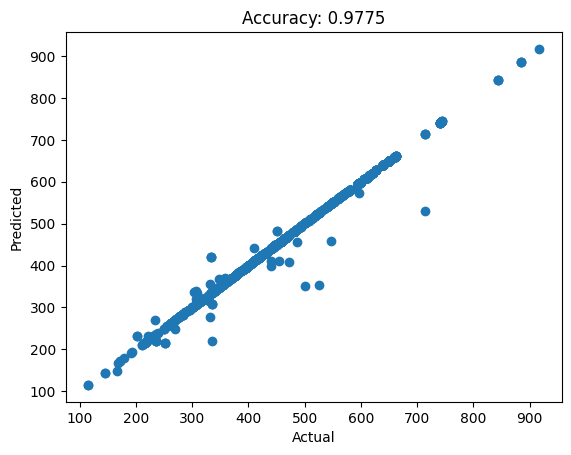

In [7]:
X = cc_df.drop(['cc_pixel_intensity_488', 'cc_pixel_intensity_405', 'cc_x', 'folder_name_x', 'degree_distribution', 'folder_name_x.1', 'folder_name_y', 'x_y', 'y_y', 'z_y', 'node', 'degree', 'cc_y', 'vol_cc', 'avg_PK_Of_element', 'element_connectivity', 'cc_average_connectivity'], axis=1)  # Adjust 'target_column' to your actual target column name
# Print rows that have NaN in any column, and print that column name
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

# For any rows that contain a NaN in X, drop it in X and drop the corresponding row in Y.
# This is done by getting the row index where X is NaN and dropping the same index in both X and Y
nan_rows = X.isna().any(axis=1)
X = X.dropna()

y = cc_df['cc_pixel_intensity_488']
y = y[~nan_rows]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.to_numpy()

# For y_train and y_test, round down to nearest 10
# y_train = (np.floor(y_train / 10) * 10).astype(int)
# y_test = (np.floor(y_test / 10) * 10).astype(int)

# Noticed weird behaviour with SVM:
# If y_train and y_test are not rounded down to nearest 10,
# then the training takes LONGER (it just wouldn't finish training on my mac)
# even though it means there are 10 times fewer classifiers to train?
# (also yes, doing that means the output would not be a regression but a classification,
# and outputs would be classified into groups of 10, as in the model would tell you whether the
# functional parameter is between 0-10, 10-20, 20-30, etc.)

# Also it was not possible to get the SVM to train on my MAC for datasets above 10k rows (10k including training and testing split)
# Training just never finished if I tried that, even if I left it running overnight.

# This makes sense though because with more classes (i.e discrete functional parameter values in this case),
# the training time grows quadratically as that many more classifiers need to be trained.

# print(y_train, y_test)

svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

y_test=y_test.to_numpy()

print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

plt.plot(y_test, y_pred, 'o')
plt.title('Accuracy: ' + str(accuracy))
plt.xlabel('Actual')
plt.ylabel('Predicted')

y_pred_svm = y_pred



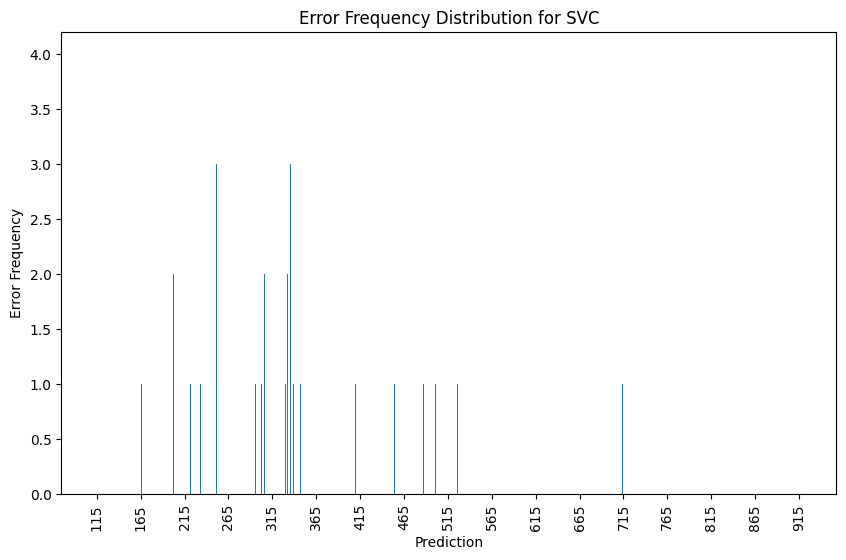

The mean error is 0.973 and the standard deviation of the errors is 8.945125544116193


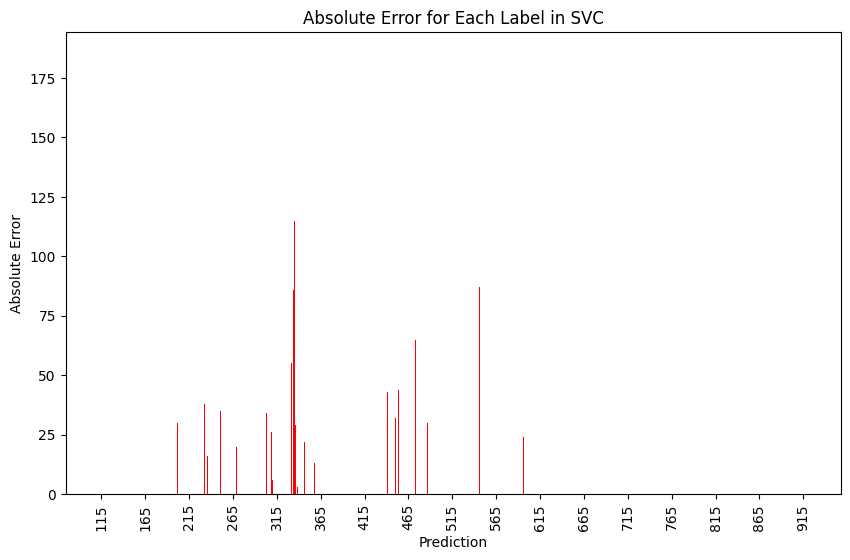

In [8]:
plot_error_frequency(y_pred_svm, y_test, 'SVC')

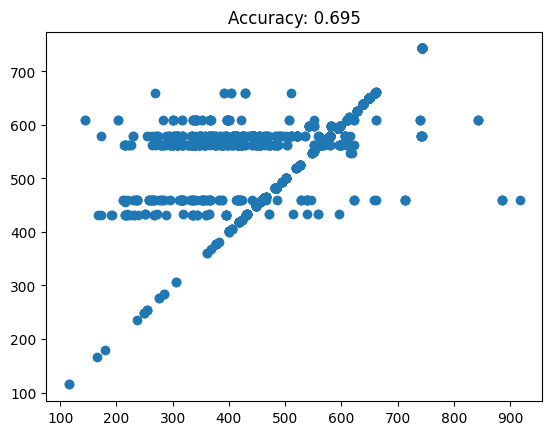

In [10]:
# do the same for random forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=300, max_depth=7, random_state=0)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

plt.plot(y_test, y_pred, 'o')
plt.title('Accuracy: {}'.format(accuracy))

y_pred_rf = y_pred

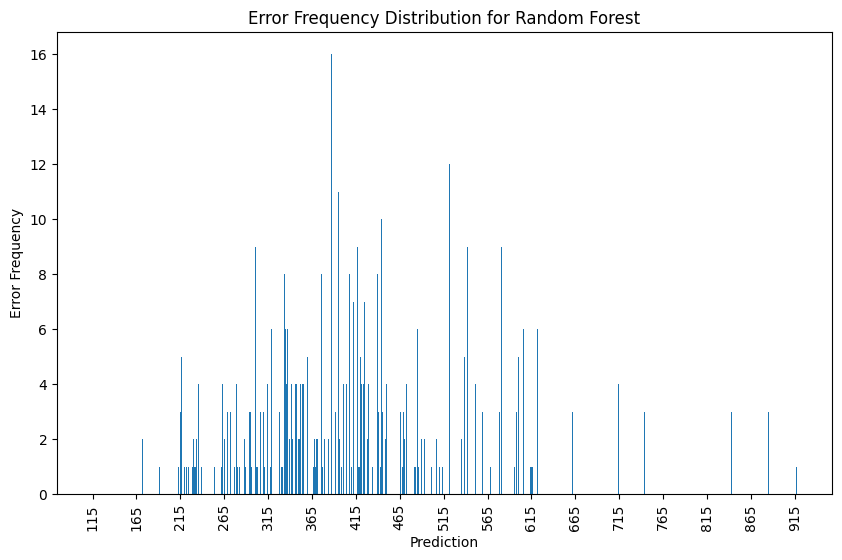

The mean error is 50.3895 and the standard deviation of the errors is 90.36277325176557


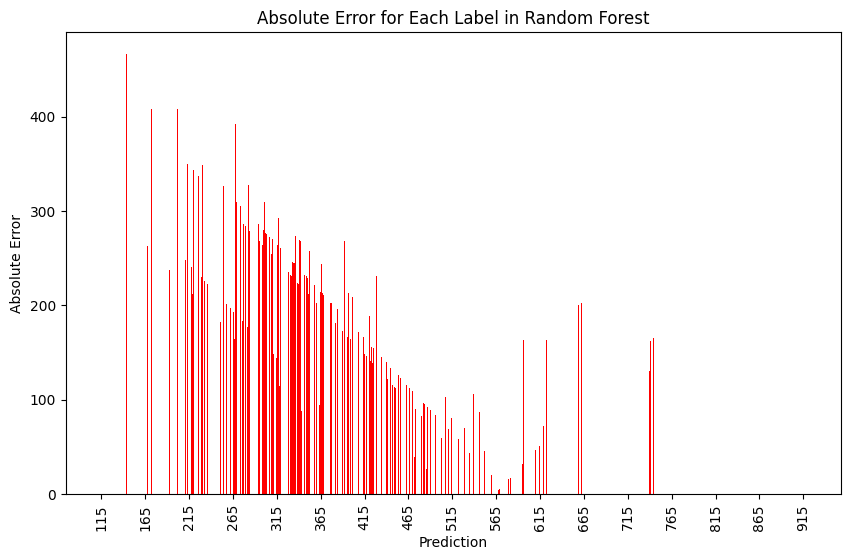

In [11]:
plot_error_frequency(y_pred_rf, y_test, 'Random Forest')

In [18]:
import plotly.graph_objects as go
import numpy as np

def plot_absolute_error_plotly(y_pred_svc, y_pred_rf, y_test):
    def calculate_error_frequency(y_pred):
        incorrect = y_pred != y_test

        unique_predictions, counts = np.unique(y_pred[incorrect], return_counts=True)
        error_freq = dict(zip(unique_predictions, counts))

        return error_freq

    error_freq_svc = calculate_error_frequency(y_pred_svc)
    error_freq_rf = calculate_error_frequency(y_pred_rf)

    all_labels = np.unique(np.concatenate((y_pred_svc, y_pred_rf)))
    all_labels.sort()

    svc_freq = [error_freq_svc.get(label, 0) for label in all_labels]
    rf_freq = [error_freq_rf.get(label, 0) for label in all_labels]

    fig = go.Figure(data=[
        go.Bar(name='SVC', x=all_labels, y=svc_freq),
        go.Bar(name='Random Forest', x=all_labels, y=rf_freq)
    ])

    fig.update_layout(
        barmode='group',
        title='Prediction Error Frequency',
        xaxis_title='Predicted Label',
        yaxis_title='Frequency of Incorrect Predictions',
        xaxis=dict(type='category')
    )

    fig.show()


def plot_error_label_frequency_plotly(y_pred_svc, y_pred_rf, y_test):
    labels = np.unique(y_test)
    errors_svc = [np.sum((y_pred_svc != y_test) & (y_test == label)) for label in labels]
    errors_rf = [np.sum((y_pred_rf != y_test) & (y_test == label)) for label in labels]

    bar_width = max(0.5, 30 / len(labels))

    fig = go.Figure(data=[
        go.Bar(name='SVC', x=labels, y=errors_svc, width=bar_width, marker_color='blue', marker_line_color='blue', marker_line_width=1.5, opacity=1),
        go.Bar(name='Random Forest', x=labels, y=errors_rf, width=bar_width, marker_color='red', marker_line_color='red', marker_line_width=1.5, opacity=1)
    ])
    
    fig.update_layout(
        barmode='group',
        title='Error Frequency per Label',
        xaxis_title='Labels',
        yaxis_title='Number of Errors',
        xaxis=dict(tickmode='array', tickvals=labels[::10]),
        plot_bgcolor='rgba(255, 255, 255, 1)',
        font=dict(
            size=12,  # You can adjust the size of the text here for better visibility
        )
    )
    fig.show()

plot_absolute_error_plotly(y_pred_svm, y_pred_rf, y_test)
plot_error_label_frequency_plotly(y_pred_svm, y_pred_rf, y_test)


In [ ]:
n = pd.read_csv('./full_node_Table_.csv')
df = pd.read_csv('./full_Table_.csv')